# 1-Data Pre-processing 

In [54]:
# Importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

In [55]:
# Importing data
train = pd.read_csv("../data/train.csv")
test = pd.read_csv('../data/test.csv')


df = train.append(test)
df.shape

C:\Users\maann\AppData\Local\Temp\ipykernel_16736\1565630613.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


(25709, 17)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25709 entries, 0 to 7712
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         25709 non-null  object 
 1   Track Name          25709 non-null  object 
 2   Popularity          25054 non-null  float64
 3   danceability        25709 non-null  float64
 4   energy              25709 non-null  float64
 5   key                 22887 non-null  float64
 6   loudness            25709 non-null  float64
 7   mode                25709 non-null  int64  
 8   speechiness         25709 non-null  float64
 9   acousticness        25709 non-null  float64
 10  instrumentalness    19423 non-null  float64
 11  liveness            25709 non-null  float64
 12  valence             25709 non-null  float64
 13  tempo               25709 non-null  float64
 14  duration_in min/ms  25709 non-null  float64
 15  time_signature      25709 non-null  int64  
 16  Class

### Change column values

In [57]:
# Filter all the rows that have duration value less than "30"
df.loc[(df['duration_in min/ms'] < 30)]['duration_in min/ms']

7       3.105783
10      4.330450
13      4.440250
25      4.015633
34      3.503783
          ...   
7688    7.752217
7697    4.621917
7700    2.672417
7701    4.890033
7710    2.453550
Name: duration_in min/ms, Length: 3731, dtype: float64

In [58]:
condition = df['duration_in min/ms'] < 30 

# If the value in duration_in_min/ms column is less than 30, then multiply the value with 60,000
df.loc[condition,'duration_in min/ms'] = df.loc[condition,'duration_in min/ms']*60000

In [59]:
df.rename(columns={"duration_in min/ms": "duration_in_ms"})

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5.0
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10.0
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6.0
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5.0
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708,Dudu Aharon,◊ë◊ó◊ï◊® ◊®◊í◊ô◊©,28.0,0.816,0.927,7.0,-1.581,1,0.0600,0.264000,NaN,0.0735,0.6430,128.019,231680.0,4,NaN
7709,Elephant Tree,Echoes,45.0,0.429,0.599,7.0,-7.236,0,0.0363,0.025400,0.009330,0.3620,0.2570,127.446,367879.0,4,NaN
7710,Shankar Mahadevan,Man Mohini,38.0,0.805,0.905,6.0,-7.222,0,0.2750,0.159000,0.000011,0.0590,0.6910,135.224,147213.0,4,NaN
7711,Talking Heads,Life During Wartime - 2005 Remaster,51.0,0.801,0.930,9.0,-7.365,1,0.0354,0.080600,0.152000,0.0558,0.9670,133.255,221320.0,4,NaN


## Checking for duplicates

In [60]:
df.duplicated().sum()

328

## Columns with NaN values
- Popularity
- key                 
- instrumentalness

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

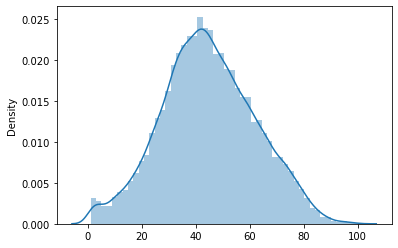

In [61]:
sns.distplot(x = df['Popularity'])

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

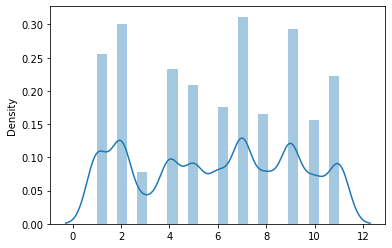

In [62]:
sns.distplot(x = df['key'])

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

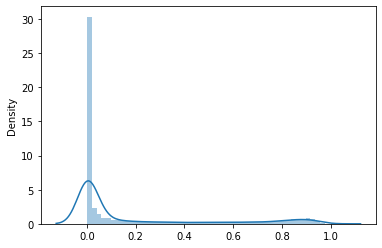

In [63]:
sns.distplot(x = df['instrumentalness'])

### Imputing NaN values
- Popularity is normally distributed, so we'll use the mean to fill NA values. 
- instrumentalness seems to be positively skewed, so the median would be a good option to fill NA values

In [64]:
df['Popularity'].fillna(df['Popularity'].mean(), inplace=True)
df['key'].fillna(df['key'].mean(), inplace=True)
df['instrumentalness'].fillna(df['instrumentalness'].mean(), inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25709 entries, 0 to 7712
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         25709 non-null  object 
 1   Track Name          25709 non-null  object 
 2   Popularity          25709 non-null  float64
 3   danceability        25709 non-null  float64
 4   energy              25709 non-null  float64
 5   key                 25709 non-null  float64
 6   loudness            25709 non-null  float64
 7   mode                25709 non-null  int64  
 8   speechiness         25709 non-null  float64
 9   acousticness        25709 non-null  float64
 10  instrumentalness    25709 non-null  float64
 11  liveness            25709 non-null  float64
 12  valence             25709 non-null  float64
 13  tempo               25709 non-null  float64
 14  duration_in min/ms  25709 non-null  float64
 15  time_signature      25709 non-null  int64  
 16  Class

In [66]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,25709.000000,25709.000000,25709.000000,25709.000000,25709.000000,25709.00000,25709.000000,25709.000000,25709.000000,25709.000000,25709.000000,25709.000000,2.570900e+04,25709.000000,17996.000000
mean,44.648360,0.544836,0.662983,5.944073,-7.889735,0.63962,0.079810,0.245377,0.175318,0.196818,0.487282,122.729307,2.358342e+05,3.922245,6.695821
std,17.196946,0.165872,0.235204,3.028227,4.029280,0.48012,0.083771,0.309852,0.262728,0.159871,0.239539,29.617081,8.642842e+04,0.364073,3.206073
min,1.000000,0.000000,0.000020,1.000000,-39.952000,0.00000,0.000000,0.000000,0.000001,0.011900,0.000000,0.000000,1.379300e+04,0.000000,0.000000
25%,33.000000,0.434000,0.509000,4.000000,-9.532000,0.00000,0.034800,0.004370,0.000305,0.097700,0.300000,99.633000,1.878530e+05,4.000000,5.000000
50%,44.000000,0.546000,0.700000,5.944073,-6.988000,1.00000,0.047300,0.079800,0.047900,0.130000,0.482000,120.259000,2.200000e+05,4.000000,8.000000
75%,56.000000,0.660000,0.861000,8.000000,-5.188000,1.00000,0.083100,0.425000,0.175318,0.258000,0.672000,141.978000,2.627200e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.00000,0.960000,0.996000,0.996000,1.000000,0.986000,249.438000,1.793160e+06,5.000000,10.000000


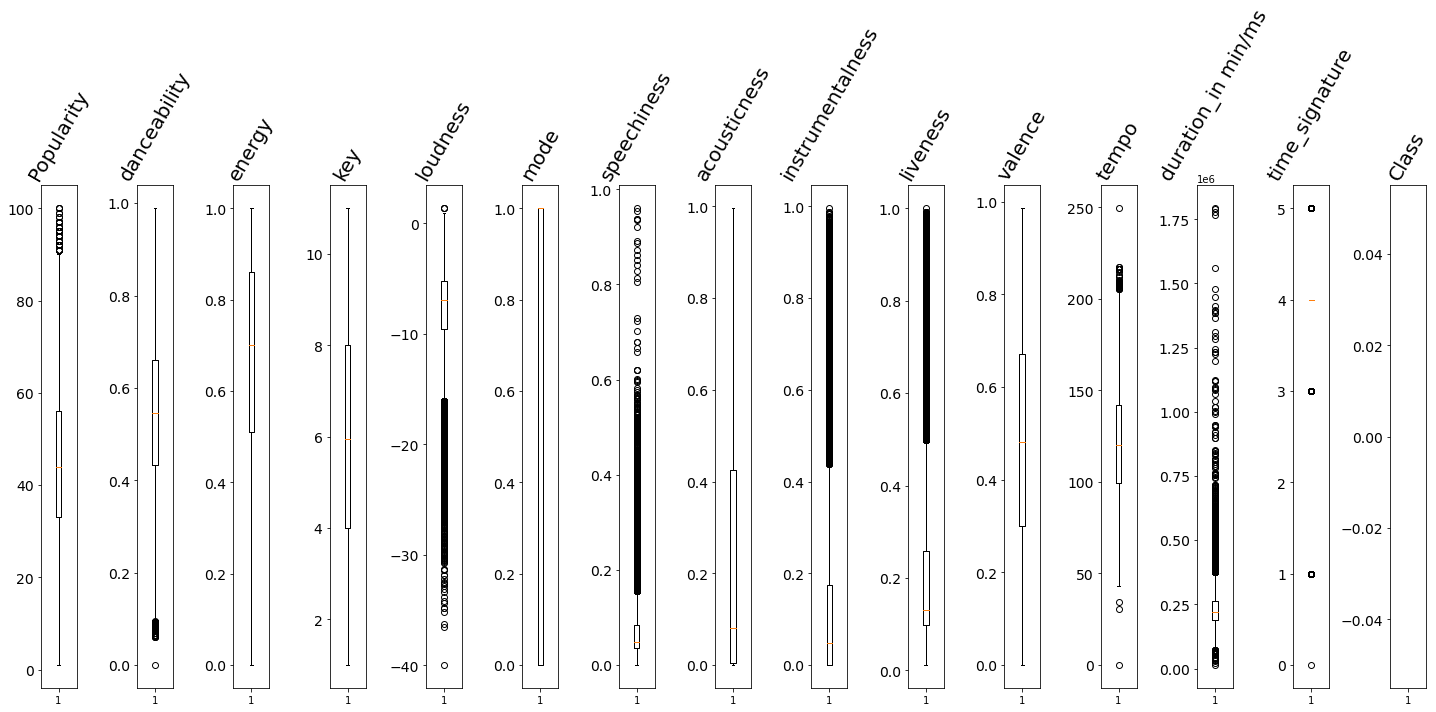

In [67]:
df_box = df.select_dtypes([int,float])
fig, axs = plt.subplots(1, len(df_box.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_box.iloc[:,i])
    ax.set_title(df_box.columns[i], fontsize=20, rotation=60)
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()


<AxesSubplot:>

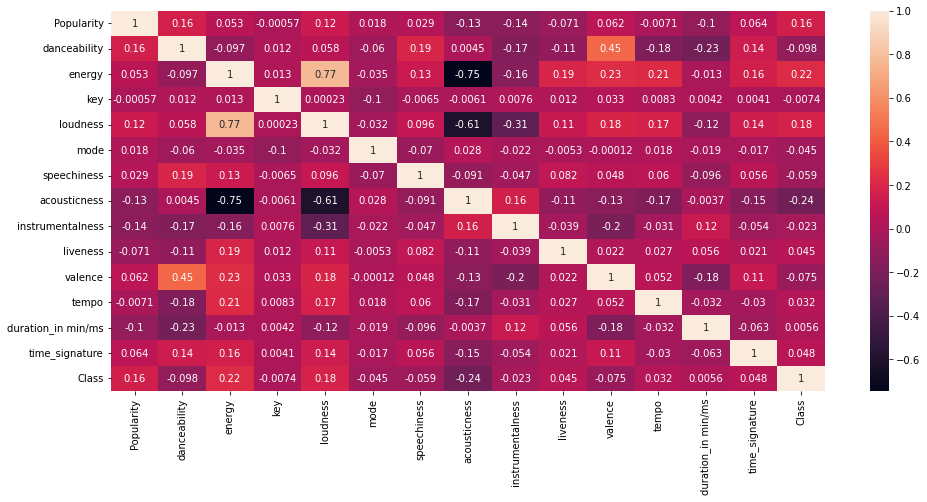

In [68]:
plt.figure(figsize=(16, 7))
sns.heatmap(df.corr(), annot = True)

In [69]:
corr = df.corr()
corr.Class.sort_values(ascending=False)

Class                 1.000000
energy                0.217328
loudness              0.177872
Popularity            0.158220
time_signature        0.047989
liveness              0.045309
tempo                 0.031737
duration_in min/ms    0.005621
key                  -0.007356
instrumentalness     -0.022711
mode                 -0.044740
speechiness          -0.059349
valence              -0.075116
danceability         -0.097681
acousticness         -0.237138
Name: Class, dtype: float64

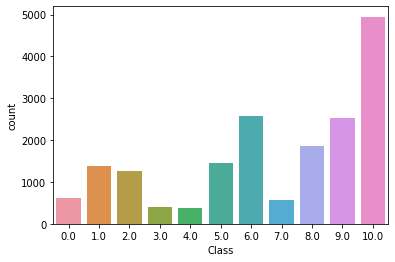

In [70]:
# Number of classes
sns.countplot(data = df, x= df["Class"])
plt.show()

### Categorical data encoding

In [71]:
columns = ["Artist Name","Track Name"]
enc = LabelEncoder()
for col in columns:
    df[col] = enc.fit_transform(df[col])

In [72]:
df[["Artist Name","Track Name"]]

,Artist Name,Track Name
0,1470,15283
1,1353,6696
2,9766,10930
3,2447,9060
4,7813,10960
...,...,...
7708,2704,19477
7709,2875,4423
7710,8463,9730
7711,9218,8939
